# Structured Dataset

## Data Sources : Kaggle Dataset (Admission Prediction), have other structured datasets also but using only Admission Prediction for POC.

## Other Data Sources we will be using : University scholarships all around the world(Kaggle), College Data(Kaggle), QS world rankings 2024(Kaggle), Integrated Post Secondary Education Data System(IPEDS Website)
                            

## Data Processing and Transformation : Store Structured Data in Snowflake as a Tables and use it as input for different AI agents and Data Visualization

## Data Loading and Exploration- We load the admission prediction dataset using pandas, which contains information about applicants test scores and admission chances. The first 5 rows are displayed to give a quick glimpse of the raw data structure and content. Basic statistics are calculated to understand the central tendencies and distributions of each feature

## Statistical Summary - The describe() function provides key statistics including mean, standard deviation, minimum, maximum, and quartile values. This summary helps identify the typical ranges for each variable and potential outliers. Information about the dataset dimensions shows us the total number of applicants and features available for analysis

## Visualizations - Several visualizations are created to understand patterns in the data, Distribution Histograms: Shows the distribution of GRE scores and admission chances, Scatter Plot: Reveals the relationship between GRE and TOEFL scores, colored by admission probability, Correlation Heatmap: Displays the strength of relationships between all variables, Pairplot: Shows relationships between key admission factors (GRE, TOEFL, CGPA, and admission chance)

# Technologies and Tools

## Data Storage: Snowflake Tables

First 5 rows of the dataset:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0  

Statistical summary of the dataset:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.14372

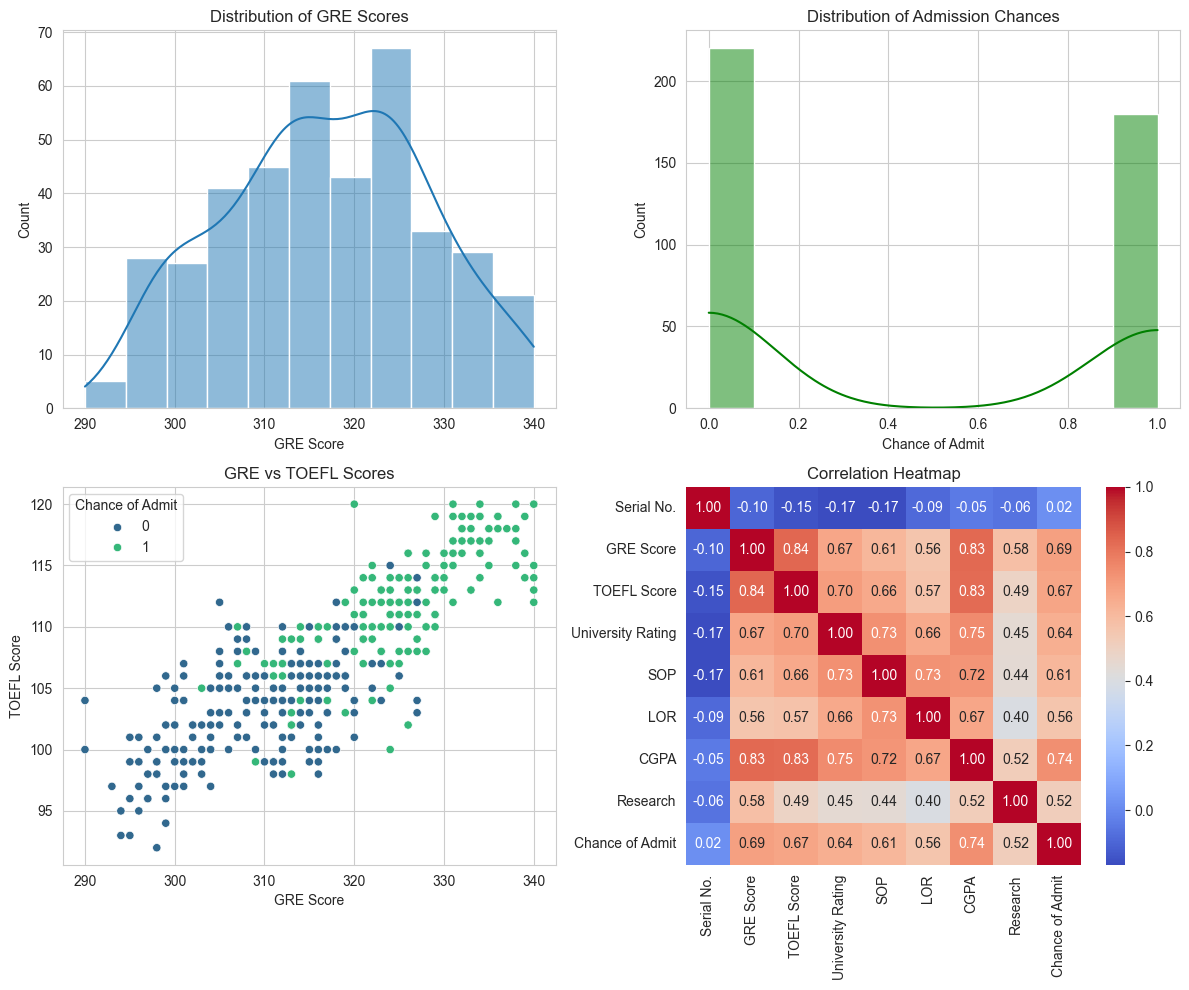


Generating pairplot for key admission factors...


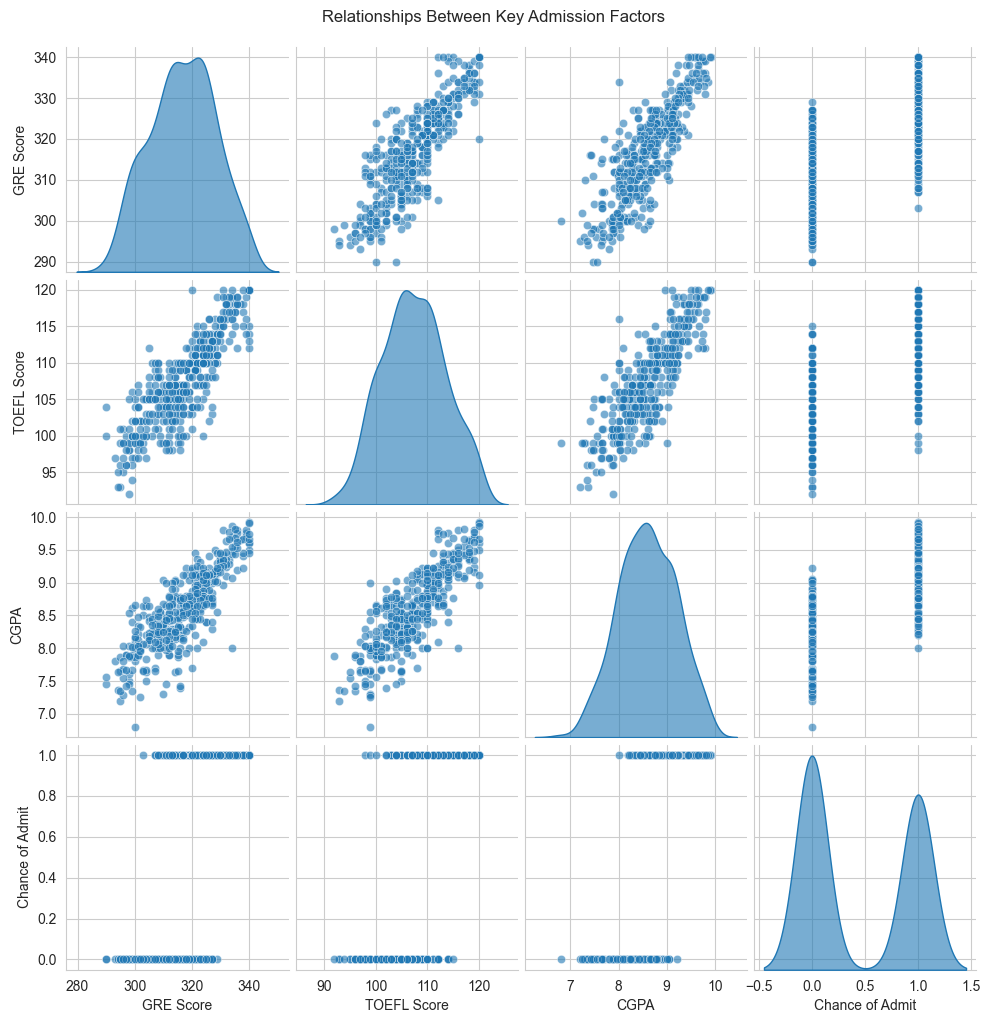

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the CSV file is in your working directory
df = pd.read_csv('Admission_Predict.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())

# Display dataset information
print("\nDataset information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Set a more appealing visual style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Create a subplot layout
plt.subplot(2, 2, 1)
# Histogram of GRE Scores
sns.histplot(df['GRE Score'], kde=True)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
# Histogram of Chance of Admit
sns.histplot(df['Chance of Admit'], kde=True, color='green')
plt.title('Distribution of Admission Chances')
plt.xlabel('Chance of Admit')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
# Scatter plot of GRE vs TOEFL
sns.scatterplot(x='GRE Score', y='TOEFL Score', 
               hue='Chance of Admit', data=df,
               palette='viridis')
plt.title('GRE vs TOEFL Scores')

plt.subplot(2, 2, 4)
# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Create a pairplot for key variables
print("\nGenerating pairplot for key admission factors...")
admission_factors = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
sns.pairplot(df[admission_factors], height=2.5, diag_kind='kde', 
             plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.6})
plt.suptitle('Relationships Between Key Admission Factors', y=1.02)
plt.show()

# Unstructured Data

## Data Sources - MIT EECS Website Scraping to get Markdowns, using this one website for POC Purpose only
## Other Data Sources - NYU Computer Science Department Admissions(Scraping), Berkeley Graduate Admisssions (Scraping) etc

# Data Processing and Transformation - Scraping the data and then converting them into a markdown file and provide it as inputs to AI agents

## The Python script collects detailed information about the Artificial Intelligence and Decision-Making graduate program at MIT EECS by visiting the official program webpage. It uses web scraping to automatically extract useful text content like:

## Program overview and objectives

## Admission requirements (GPA, test scores, background)

## Coursework and curriculum highlights

## Funding opportunities or scholarships

## The script uses requests to fetch the web page and BeautifulSoup to parse the HTML content. It looks specifically for headings (<h2>), paragraphs (<p>), and bullet points (<li>), then organizes them neatly into a Markdown (.md) file.

## This is useful because:

## It helps students or researchers gather all important program details in one place.

## The markdown output makes it easy to share, format, or convert to other formats like PDF.



# Technologies and Tools

## Scraping - BeautifulSoup, Selenium and Playwright
## Storage - Amazon S3, Pinecone (Storing Indexing and Embeddings)


In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://www.eecs.mit.edu/academics/graduate-programs/admission-process/graduate-admissions-information-letter/"
headers = {"User-Agent": "Mozilla/5.0"}

def fetch_page(url):
    response = requests.get(url, headers=headers)
    return BeautifulSoup(response.content, "html.parser")

def scrape_ai_program_info():
    soup = fetch_page(url)
    markdown = "# MIT EECS – Artificial Intelligence and Decision Making Program\n\n"
    markdown += f"**Source**: {url}\n\n"

    # Scrape content under h2, p, and li
    for tag in soup.find_all(['h2', 'p', 'li']):
        tag_name = tag.name
        text = tag.get_text(strip=True)
        if not text:
            continue
        if tag_name == 'h2':
            markdown += f"\n## {text}\n"
        elif tag_name == 'p':
            markdown += f"\n{text}\n"
        elif tag_name == 'li':
            markdown += f"- {text}\n"

    return markdown

if __name__ == "__main__":
    markdown_content = scrape_ai_program_info()

    # Save to Markdown file
    with open("MIT_Admissions_Requirement.md", "w", encoding="utf-8") as f:
        f.write(markdown_content)

    print("✅ Saved: MIT_Admissions_Requirement.md")


✅ Saved: MIT_Admissions_Requirement.md
